In [1]:
%pip install --upgrade pip
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
"""Kyrylo Boiko Lab 8"""

import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


data = load_wine()
X = data.data
y = data.target


In [ ]:
"""Kyrylo Boiko Lab 8"""

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA()
X_pca = pca.fit_transform(X_scaled)


explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


In [ ]:
"""Kyrylo Boiko Lab 8"""

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')

plt.subplot(1, 2, 2)
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each Component')
plt.show()

n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components that explain 95% of the variance: {n_components}")

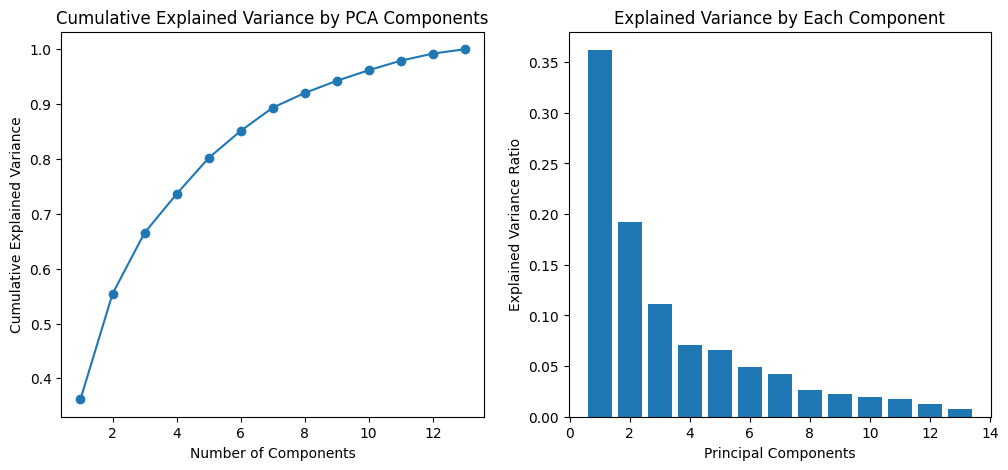

Number of components that explain 95% of the variance: 10
Classification accuracy with PCA components: 0.9815
Classification accuracy without PCA components: 0.9815
Accuracy with PCA: 0.9815
Accuracy without PCA: 0.9815


In [ ]:
"""Kyrylo Boiko Lab 8"""

X_pca_n = X_pca[:, :n_components]
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca_n, y, test_size=0.3, random_state=42)

model_pca = LogisticRegression(max_iter=500)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"Classification accuracy with PCA components: {accuracy_pca:.4f}")


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model_orig = LogisticRegression(max_iter=500)
model_orig.fit(X_train, y_train)
y_pred_orig = model_orig.predict(X_test)
accuracy_orig = accuracy_score(y_test, y_pred_orig)
print(f"Classification accuracy without PCA components: {accuracy_orig:.4f}")


print(f"Accuracy with PCA: {accuracy_pca:.4f}")
print(f"Accuracy without PCA: {accuracy_orig:.4f}")
